In [31]:
#2021.06.22 TUE
#Hankyeong

##CH08-1. 단순선형회귀(Simple Linear Regression)
#00-1. 패키지 호출
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#00-2. 시각화 옵션 설정하기. 
%matplotlib inline 

#01. Galton Height 데이터셋에 numpy 패키지를 이용해 아버지와 아들의 키의 인과관계 분석하기. 
#(1) 데이터셋 불러오기. 
df_galton_raw = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')
df_galton_raw

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4
...,...,...,...,...,...,...
893,136A,68.5,65.0,M,68.5,8
894,136A,68.5,65.0,M,67.7,8
895,136A,68.5,65.0,F,64.0,8
896,136A,68.5,65.0,F,63.5,8


In [2]:
#(2) 필요 변수만 추출 및 변수 명을 변경하고, inch단위를 cm단위로 변경하기. 
df_galton = df_galton_raw[df_galton_raw['Gender'] == 'M']
df_galton = df_galton[['Father','Height']].rename(columns={'Height':'Son'})
df_galton = df_galton * 2.54 
df_galton

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150
8,190.50,180.340
10,190.50,179.070
...,...,...
890,173.99,182.880
891,173.99,179.070
892,173.99,174.498
893,173.99,173.990


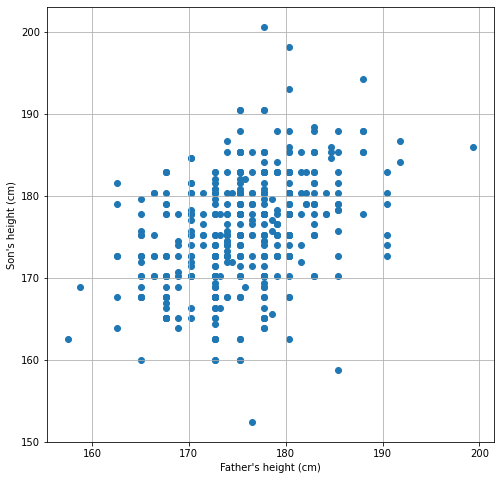

In [3]:
#(3) 산점도 확인하기. 
plt.figure(figsize=(8,8))
plt.scatter(df_galton['Father'], df_galton['Son'])
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.grid()
plt.show()

In [4]:
#(4) numpy 패키지를 이용해 회귀선 구하기. 
#①
A = np.vstack([df_galton['Father'], np.ones(len(df_galton['Father']))]).T
A.shape

(465, 2)

In [5]:
#PLUS. 
df_galton['Father'].shape

(465,)

In [6]:
#② 회귀선 추출
reg = np.linalg.lstsq(A, df_galton['Son'], rcond=None)
reg

(array([ 0.44774792, 97.17763701]),
 array([17556.59951549]),
 2,
 array([3.79064358e+03, 7.15847817e-01]))

In [8]:
#③ 회귀선의 기울기, 절편 구하기. 
coef, intercept = reg[0]
coef, intercept

(0.44774791760302285, 97.1776370073939)

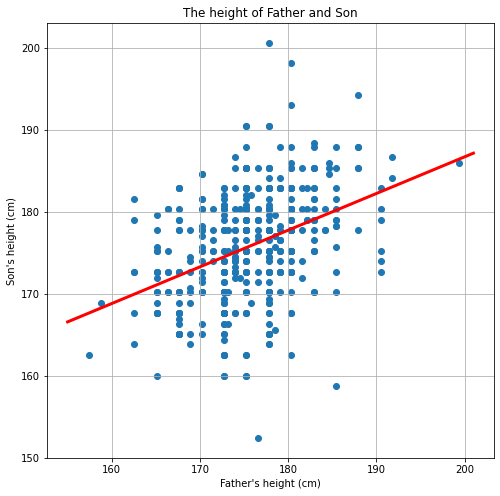

In [9]:
#(5) 회귀선과 산점도 그리기. 
plt.figure(figsize=(8,8))
plt.scatter(df_galton['Father'], df_galton['Son'])
plt.plot([155,201],[m*155+c, m*201+c], 'r', lw=3)
plt.title('The height of Father and Son')
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.grid()
plt.show()

In [11]:
#02. Galton Height 데이터셋에 sklearn 패키지를 이용해 아버지와 아들의 키의 인과관계 분석하기. 
#(1) 독립변수, 종속변수 설정하기. 
x = df_galton['Father'].values.reshape(-1,1)
y = df_galton['Son'].values
#MEMO. 무조건 Feature 데이터셋은 2차원으로 정의해야함. 

#(2) 모델 설정하기. 
lr = LinearRegression()

#(3) 모델 학습하기. 
lr.fit(x,y)

LinearRegression()

In [13]:
#(4) 회귀선의 기울기, 절편 구하기. 
coef = lr.coef_[0] 
intercept = lr.intercept_
coef, intercept

(0.4477479176030255, 97.17763700739346)

In [15]:
#(5) 결정계수(R-Squared) 구하기. 
lr.score(x,y)

0.15312927478306992

In [18]:
#03. diabetes 데이터셋으로 회귀분석하기. 
#(1) 데이터셋 불러오기. 
diabetes = load_diabetes() 

#(2) 데이터프레임으로 변환하기. 
df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes['target'] = diabetes.target
df_diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [19]:
#(3) 데이터셋 탐색하기. 
df_diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [22]:
#(4) feature, target 데이터 정의하기. 
x = df_diabetes['bmi'].values.reshape(-1,1)
y = df_diabetes['target'].values.reshape(-1,1)

#(5) 모델 정의하기. 
lr = LinearRegression()

#(6) 모델 학습하기. 
lr.fit(x,y)

LinearRegression()

In [29]:
#(7) 회귀선의 기울기, 절편 구하기. 
coef = lr.coef_[0][0]
intercept = lr.intercept_[0]
coef, intercept

(949.4352603839491, 152.1334841628967)

In [30]:
#(8) 결정계수(R-Squared) 구하기. 
lr.score(x,y)

0.3439237602253803

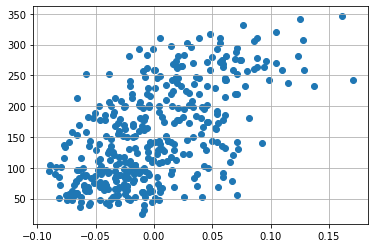

In [37]:
#04. train, test 데이터셋으로 나눠서 target 예측하기. 
#(1) 데이터셋 분할하기. 
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.1, random_state=2021
)
#(2) train 데이터셋의 산점도 그리기. 
plt.scatter(x_train, y_train)
plt.grid()
plt.show()

In [36]:
#(4) 모델 정의하기. 
lr = LinearRegression()

#(4) 모델 학습하기
lr.fit(x_train,y_train)

LinearRegression()

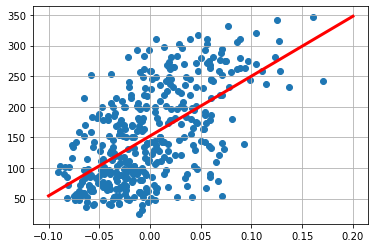

In [46]:
#(5) 회귀선 그리기. 
w, b = lr.coef_[0][0], lr.intercept_[0]
plt.scatter(x_train, y_train)
plt.plot([-0.1,0.20], [-0.1*w+b, 0.20*w+b], 'r', lw=3)
plt.grid()
plt.show()

In [34]:
#(6) 모델 예측하기.
pred = lr.predict(x_test)

#(7) 예측값 R^2로 평가하기. 
r2_score(y_test, pred)

0.17874580965139086

In [35]:
#(8) 예측값 RMSE로 평가하기.  
np.sqrt(mean_squared_error(y_test,pred))

59.809182374892266